#Bank Marketing Campaign
created by: Arnoldus Purbrayen D.S



#Konteks dan Problem

**Konteks**

Jenis-jenis produk keuangan yang digunakan oleh masyarakat menjadi lebih beragam. Salah satu produk keuangan yang dikenal luas oleh masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah pelanggan menyetorkan sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya bisa ditarik setelah jangka waktu tertentu. Sebagai imbalan, pelanggan akan diberikan bunga tetap sesuai dengan jumlah uang yang didepositokan.

Namun demikian, sebagai entitas bisnis dengan produk-produk keuangan dan pelanggan masing-masing, bank masih harus bersaing agar tidak kehilangan pelanggan. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.

Target :

0: Tidak dapat pelanggan baru

1: Dapat pelanggan baru

**Problem**

Dalam mencari pelanggan baru dibutuhkan waktu dan modal yang tidak sedikit. Namun masalah yang dapat terjadi adalah Keterbatasan Akses Likuiditas uang yang tidak dapat ditarik sebelum jangka waktu habis dan harus membayar harga final. Serta masalah berikutnya adalah jumlah ketetapan bunga yang tidak menghasilkan manfaat dari kenaikan suku bunga. Maka perusahaan akan melakukan kampanye pemasaran namun dengan berbayar sehingga modal yang di keluarkan tidak akan sepenuhnya hilang.

**Goals**

Perusahaan bank ingin mendapatkan pelanggan yang sudah bersedia untuk menggunakan deposit diperusahaan bank yang sedang mengadakan kampanye.Serta memaksilimasi anggaran pemasaran. Serta hal terkahir yang menjadi patokan adalah peningkatan pengetahuan akan pelanggan , dikarenakan ada beberapa kegagalan maka perushaan akan menargetkan pelanggan yang tepat sehingga anggaran yang keluar menjadi lebih efisien

**Analytical Approach**

Tujuan utama yang dakan dikerjakan adalah membuat pola apakah pelanggan mau mendaftar deposit atau tidak

metode yang digunakan adalah metode klasifikasi data untuk menyeleksi pelanggan yang akan mendaftar



# **Stackholders**


1. **Manajemen Eksekutif:**
   - Pemahaman tentang efektivitas kampanye pemasaran.
   - Penentuan strategi pemasaran berdasarkan hasil kampanye sebelumnya.



#Data Understanding

In [ ]:
pip install --upgrade category_encoders

In [ ]:
pip install scikit-learn==1.0.2


In [ ]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv("data_bank_marketing_campaign.csv")
df.head(21)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


In [ ]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

ubah string yes and no menjadi 1 dan 0 untuk mempermudah menyeleksi data

In [ ]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,0,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,1,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,0,cellular,may,1,352,other,1
3,38,services,-87,yes,0,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,0,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,0,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,0,cellular,feb,2,184,success,1
7810,36,unknown,179,no,0,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,0,cellular,nov,1,-1,unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   int64 
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 671.6+ KB


- Data terdiri dari 10 kolom


In [ ]:
df.describe()

,age,balance,loan,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,0.131064,2.519775,51.408550,0.477665
std,11.919710,3089.291831,0.337492,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,0.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,0.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,0.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,1.000000,63.000000,854.000000,1.000000


In [ ]:
df.dtypes

age          int64
job         object
balance      int64
housing     object
loan         int64
contact     object
month       object
campaign     int64
pdays        int64
poutcome    object
deposit      int64
dtype: object

#Data Cleaning

In [ ]:
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Tidak terdapat nan pada data

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[24, 30]"
1,job,object,0,0.0,12,"[housemaid, student]"
2,balance,int64,0,0.0,3153,"[3904, 140]"
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,int64,0,0.0,2,"[1, 0]"
5,contact,object,0,0.0,3,"[cellular, unknown]"
6,month,object,0,0.0,12,"[oct, jul]"
7,campaign,int64,0,0.0,32,"[24, 18]"
8,pdays,int64,0,0.0,422,"[225, 535]"
9,poutcome,object,0,0.0,4,"[failure, other]"


Disini terdapat 2 kolom yang tidak berguna untuk analisa data, dimana kedua kolom tersebut adalah housing dan contact. Kedua kolom tersebut hanya sebagai informasi tambahan

In [ ]:
df.drop(['housing'],axis=1, inplace=True)

Kita drop kedua kolom tersebut

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[35, 81]"
1,job,object,0,0.0,12,"[unknown, technician]"
2,balance,int64,0,0.0,3153,"[741, -383]"
3,loan,int64,0,0.0,2,"[0, 1]"
4,contact,object,0,0.0,3,"[telephone, unknown]"
5,month,object,0,0.0,12,"[may, dec]"
6,campaign,int64,0,0.0,32,"[33, 2]"
7,pdays,int64,0,0.0,422,"[521, 302]"
8,poutcome,object,0,0.0,4,"[unknown, other]"
9,deposit,int64,0,0.0,2,"[0, 1]"


Kedua kolom sudah sudah dihilangkan , lalu data sudah bisa di analisis. Disini sudah diesdiakan beberapa tipe data. Tidak terdapat nan pada setiap data. Lalu kita bisa lanjut untuk membuat beberapa plot dari data data diatas

##Bar Plot

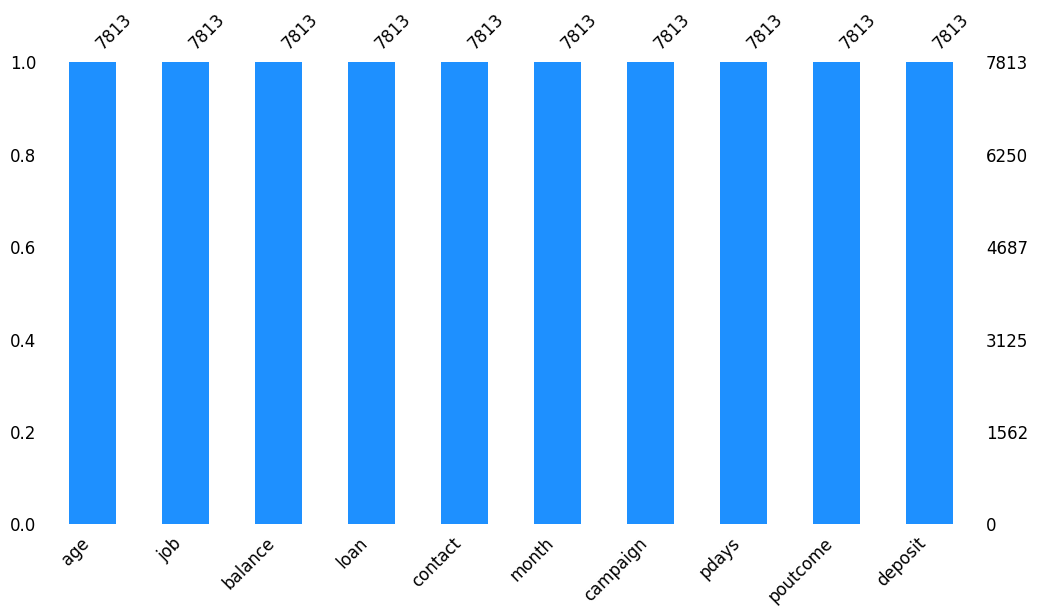

In [ ]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(12,6), fontsize=12);

ketika bar plot sudah dibuat bisa kita lihat bahwa terdapat bentuk barplot yang rata. Ini menandakan tidak adanya kehilangan data terhadap semua kolom kolom diatas. Kolom diatas adalah (age,job,balance,loan,campaign,contact,pdays,poutcome,deposit).

##Matrix Plot

<Axes: >

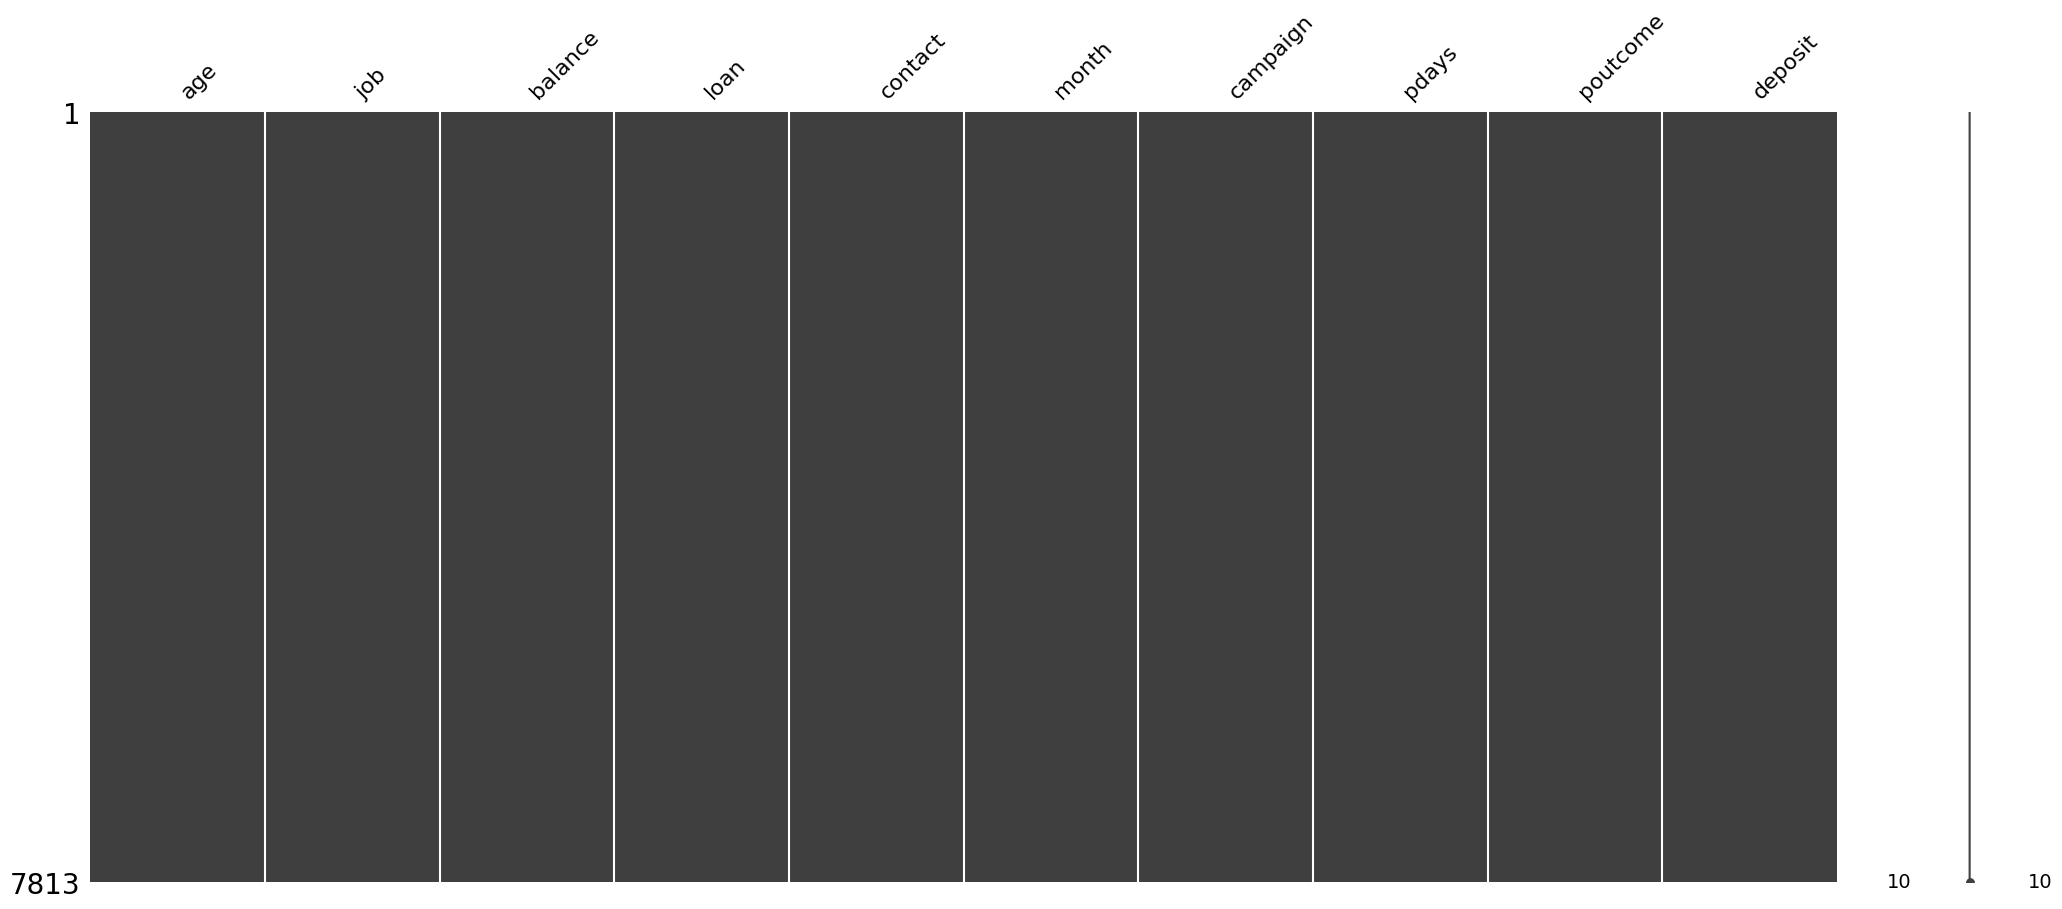

In [ ]:
missingno.matrix(df)

Pola yang dibuat tidak acak dan sangat rapih dimana semua bar terisi dan tidak bergaris garis

##Heatmap

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


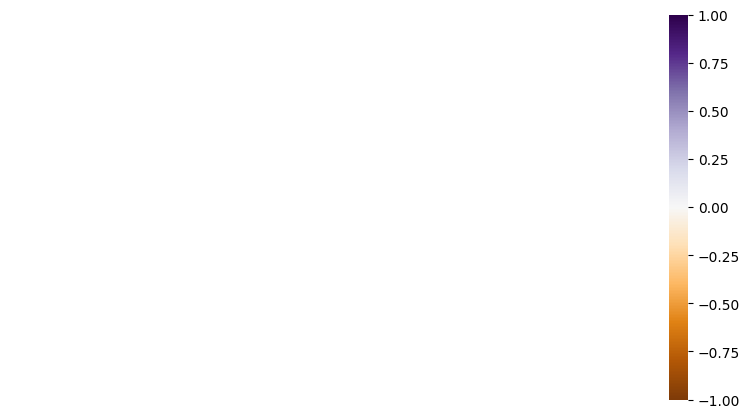

In [ ]:
missingno.heatmap(df, cmap='PuOr', figsize=(10,5), fontsize=12);

disini terdapat 3 indikator

-1 : menunjukan korelasi negatif hanya menujukan  satu variabel ada namun yg lain pasti tidak memiliki nilai

0: tidak ada korelasi

1: korelasi positif menujukan bahwa ada hubungan satu variabel dengan varriabel lain


Setelah dibuat dengan heatmap yang tersedia , di dalam plotnya tidak menunjukan adanya missing value antar kolom yang tersedia diatas. Maka kita bisa melanjutkan tahap yang lainnya

#Dendogram

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


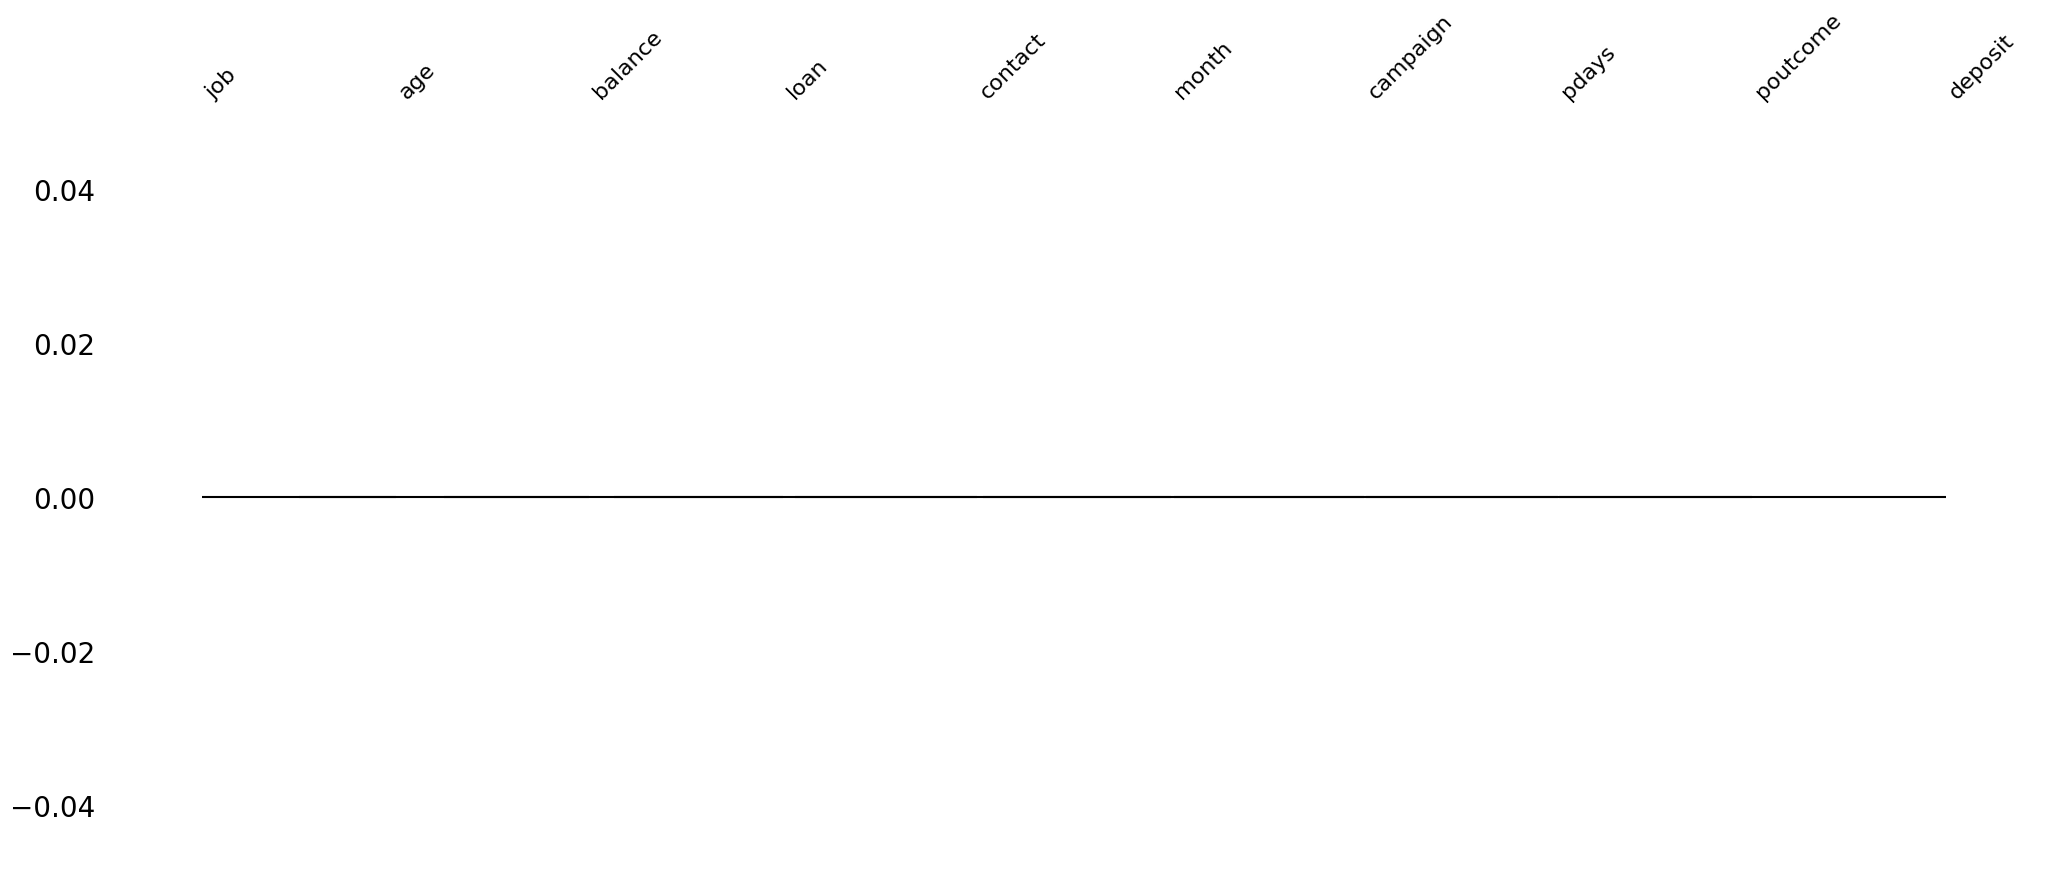

In [ ]:
missingno.dendrogram(df)
plt.show()

 jika dua atau lebih cabang (kelompok) berada pada garis lurus horizontal, ini menunjukkan bahwa cabang-cabang tersebut memiliki jarak yang sama atau hampir sama dari titik pemotongan dendrogram. Ini berarti grup data yang terkait dengan cabang-cabang tersebut memiliki tingkat kesamaan atau keterkaitan yang serupa.

In [ ]:
df.groupby(['balance','loan']).count()[['deposit']].transpose()

balance -6847  -3058  -2282  -1965  -1944  -1701  -1636  -1531  -1489  -1451   \
loan         1      1      1      1      0      0      1      0      1      1   
deposit      1      1      1      1      1      1      1      1      1      1   

balance -1415  -1386  -1206  -1139  -1053  -1050  -1042  -994   -974   -972    \
loan         1      1      0      0      0      0      0      1      1      0   
deposit      1      1      1      1      1      1      1      1      1      1   

balance    -971   -970   -938   -934   -930   -888   -887   -861   -849    \
loan     1      1      0      0      0      0      1      0      1      1   
deposit  1      1      1      1      1      1      1      1      1      1   

balance -839   -825   -824   -813   -811   -805   -799   -782   -770   -762    \
loan         1      0      0      1      0      0      1      1      0      1   
deposit      1      1      1      1      1      1      1      1      1      1   

balance -754   -752   -745   -722   -713   -701      -700   -675   -671    \
loan         1      0      1      1      0      0  1      0      1      0   
deposit      2      1      1      1      1      1  1      1      1      1   

balance -666   -663   -639   -637   -636   -634   -633   -616   -614   -613    \
loan         0      0      0      1      0      0      0      1      0      0   
deposit      2      1      1      1      1      1      1      1      1      1   

balance -601   -600   -588   -581   -575   -565   -558   -556   -553   -547    \
loan         0      0      0      0      0      0      0      1      0      0   
deposit      1      1      1      1      1      1      1      2      1      2   

balance    -546   -538   -529   -522      -516   -509   -508   -505   -504    \
loan     1      0      0      0      0  1      0      0      0      0      0   
deposit  1      1      1      1      2  2      1      1      1      1      1   

balance    -498   -497   -496   -493   -492   -491   -487   -479   -475    \
loan     1      0      1      0      0      1      0      0      0      0   
deposit  1      1      2      1      1      1      1      1      1      1   

balance -473   -470   -468      -467   -466   -463   -462   -461      -456    \
loan         0      0      0  1      0      1      0      0      0  1      1   
deposit      2      1      1  1      1      1      1      1      2  1      1   

balance -454      -451   -449   -448   -444   -443   -438   -426   -423    \
loan         0  1      1      0      0      1      1      0      1      1   
deposit      1  3      1      1      1      1      1      1      1      1   

balance -422   -416   -413      -411   -410   -407      -398   -397       \
loan         0      0      0  1      0      1      0  1      0      0  1   
deposit      1      1      1  1      2      1      1  1      1      1  1   

balance -396      -395   -393      -392   -390   -389   -388      -386    \
loan         0  1      0      0  1      0      0      1      0  1      1   
deposit      1  1      1      1  1      1      1      2      1  1      1   

balance -384   -383   -382   -379   -378   -375      -374   -372   -367    \
loan         0      0      0      1      0      0  1      0      0      0   
deposit      1      1      2      1      1      2  1      1      1      3   

balance -366   -365   -364   -361   -360   -357   -354   -353   -349   -346    \
loan         0      0      0      0      0      0      1      0      0      1   
deposit      1      1      1      1      1      1      2      1      1      1   

balance -344   -341   -337   -336   -330   -329   -328   -327   -326   -321    \
loan         1      1      1      1      1      0      0      0      0      0   
deposit      1      2      2      1      1      1      1      1      1      2   

balance -320   -315   -314   -312      -311   -309      -308   -306       \
loan         0      1      0      0  1      0      0  1      0      0  1   
deposit      1      1      2      2  1  

kombinasi nilai tertentu pada kolom 'balance' dan 'loan', dan nilai-nilai tersebut dijumlahkan dalam kolom 'deposit'. Hal ini membantu memberikan gambaran tentang seberapa banyak entri yang memiliki nilai yang sama atau serupa pada kombinasi 'balance' dan 'loan', dan bagaimana hal tersebut berkaitan dengan nilai pada kolom 'deposit'.  Dimana jumlah pada kombinasi tersebut hanya digunakan utuk mencari pelanggan yang menggunakan deposit

##### Numerical Features Distribution

In [ ]:
df.describe()

,age,balance,loan,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,0.131064,2.519775,51.408550,0.477665
std,11.919710,3089.291831,0.337492,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,0.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,0.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,0.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,1.000000,63.000000,854.000000,1.000000


In [ ]:
df.dropna().describe()

,age,balance,loan,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,0.131064,2.519775,51.408550,0.477665
std,11.919710,3089.291831,0.337492,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,0.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,0.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,0.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,1.000000,63.000000,854.000000,1.000000


Data tidak ada yg missing

In [ ]:
df['deposit'].value_counts()

0    4081
1    3732
Name: deposit, dtype: int64

In [ ]:
df.dropna()['deposit'].value_counts()

0    4081
1    3732
Name: deposit, dtype: int64

In [ ]:
df['deposit'].value_counts()/len(df['deposit']) * 100

0    52.233457
1    47.766543
Name: deposit, dtype: float64

In [ ]:
df.dropna()['deposit'].value_counts()/len(df.dropna()['deposit']) * 100

0    52.233457
1    47.766543
Name: deposit, dtype: float64

Data dalam kolom deposit tidak berubah sama sekali dan tidak terdapat missing data di dalam  kolom deposit

##Categorical Features Distribution

In [ ]:
df.describe(include=['O'])

,job,contact,month,poutcome
count,7813,7813,7813,7813
unique,12,3,12,4
top,management,cellular,may,unknown
freq,1792,5628,1976,5819


Terdapat uknown pada kolomn puout come dan kita akan drop uknown data tersebut

In [ ]:
df = df[df['poutcome'] != 'unknown']
df = df[df['contact'] != 'unknown']

In [ ]:
df.describe(include=['O'])

,job,contact,month,poutcome
count,1978,1978,1978,1978
unique,12,2,12,3
top,management,cellular,may,failure
freq,509,1839,428,843


Data uknown berhasil di drop

In [ ]:
df.dropna().describe(include=['O'])

,job,contact,month,poutcome
count,1978,1978,1978,1978
unique,12,2,12,3
top,management,cellular,may,failure
freq,509,1839,428,843


#Data Analysis

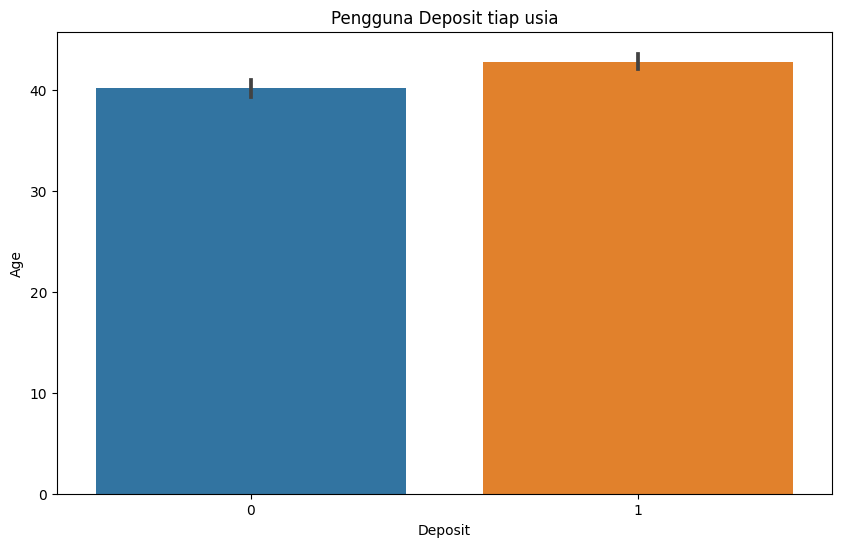

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='deposit', y='age', data=df)
plt.title('Pengguna Deposit tiap usia')
plt.xlabel('Deposit')
plt.ylabel('Age')
plt.show()

Dalam barplot ini kita bisa meilhat user yang menggunakan deposit atau tidak. Disini terbagi menjadi 2 yakni yes dan no dimana user yes lebih banyak . Hal ini menunjukan pengguna lebih banyak  menggunakan deposit.

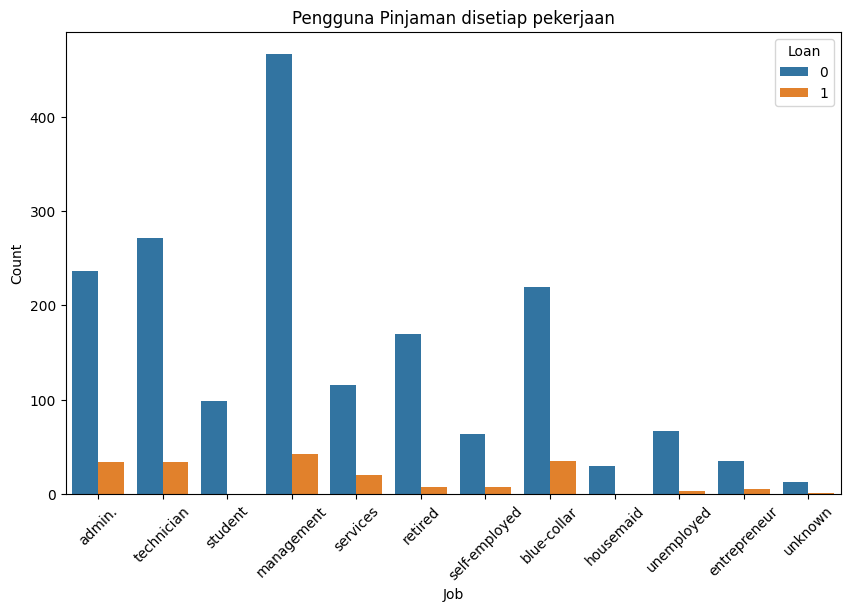

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='loan', data=df)
plt.title('Pengguna Pinjaman disetiap pekerjaan')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan')
plt.show()

Didalam bar plot ini telah disediakan beberapa segmen pekerjaan yang berbeda yang menggunakan pinjaman

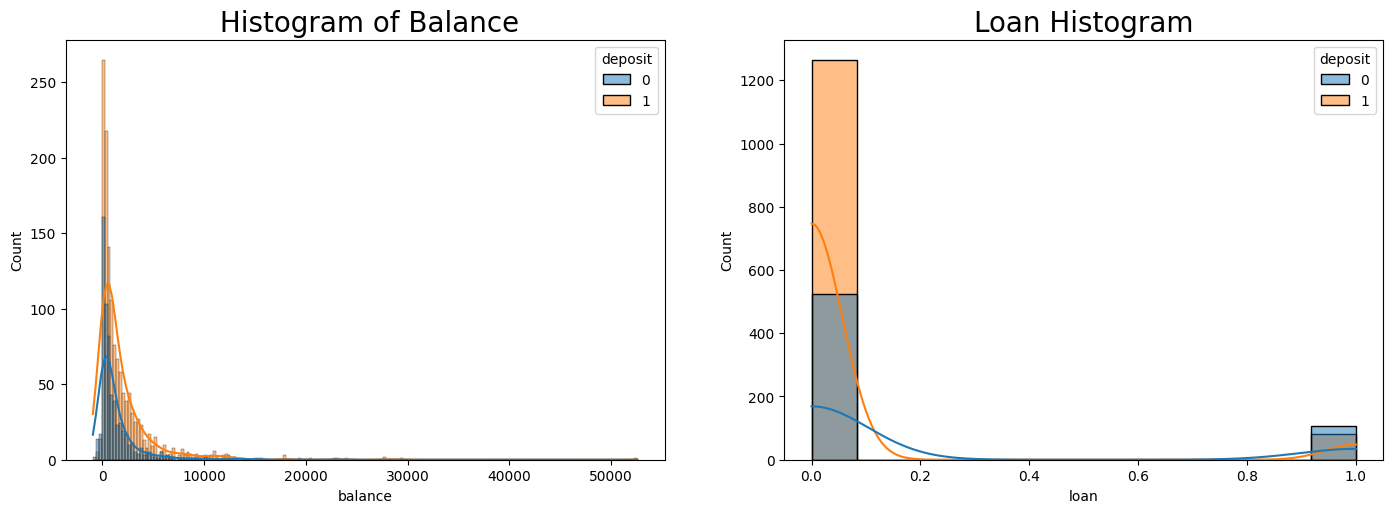

In [ ]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='balance',hue='deposit',kde=True)
plt.title(' Histogram of Balance',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='loan',hue='deposit',kde=True)
plt.title('Loan Histogram',fontsize=20)

plt.show()

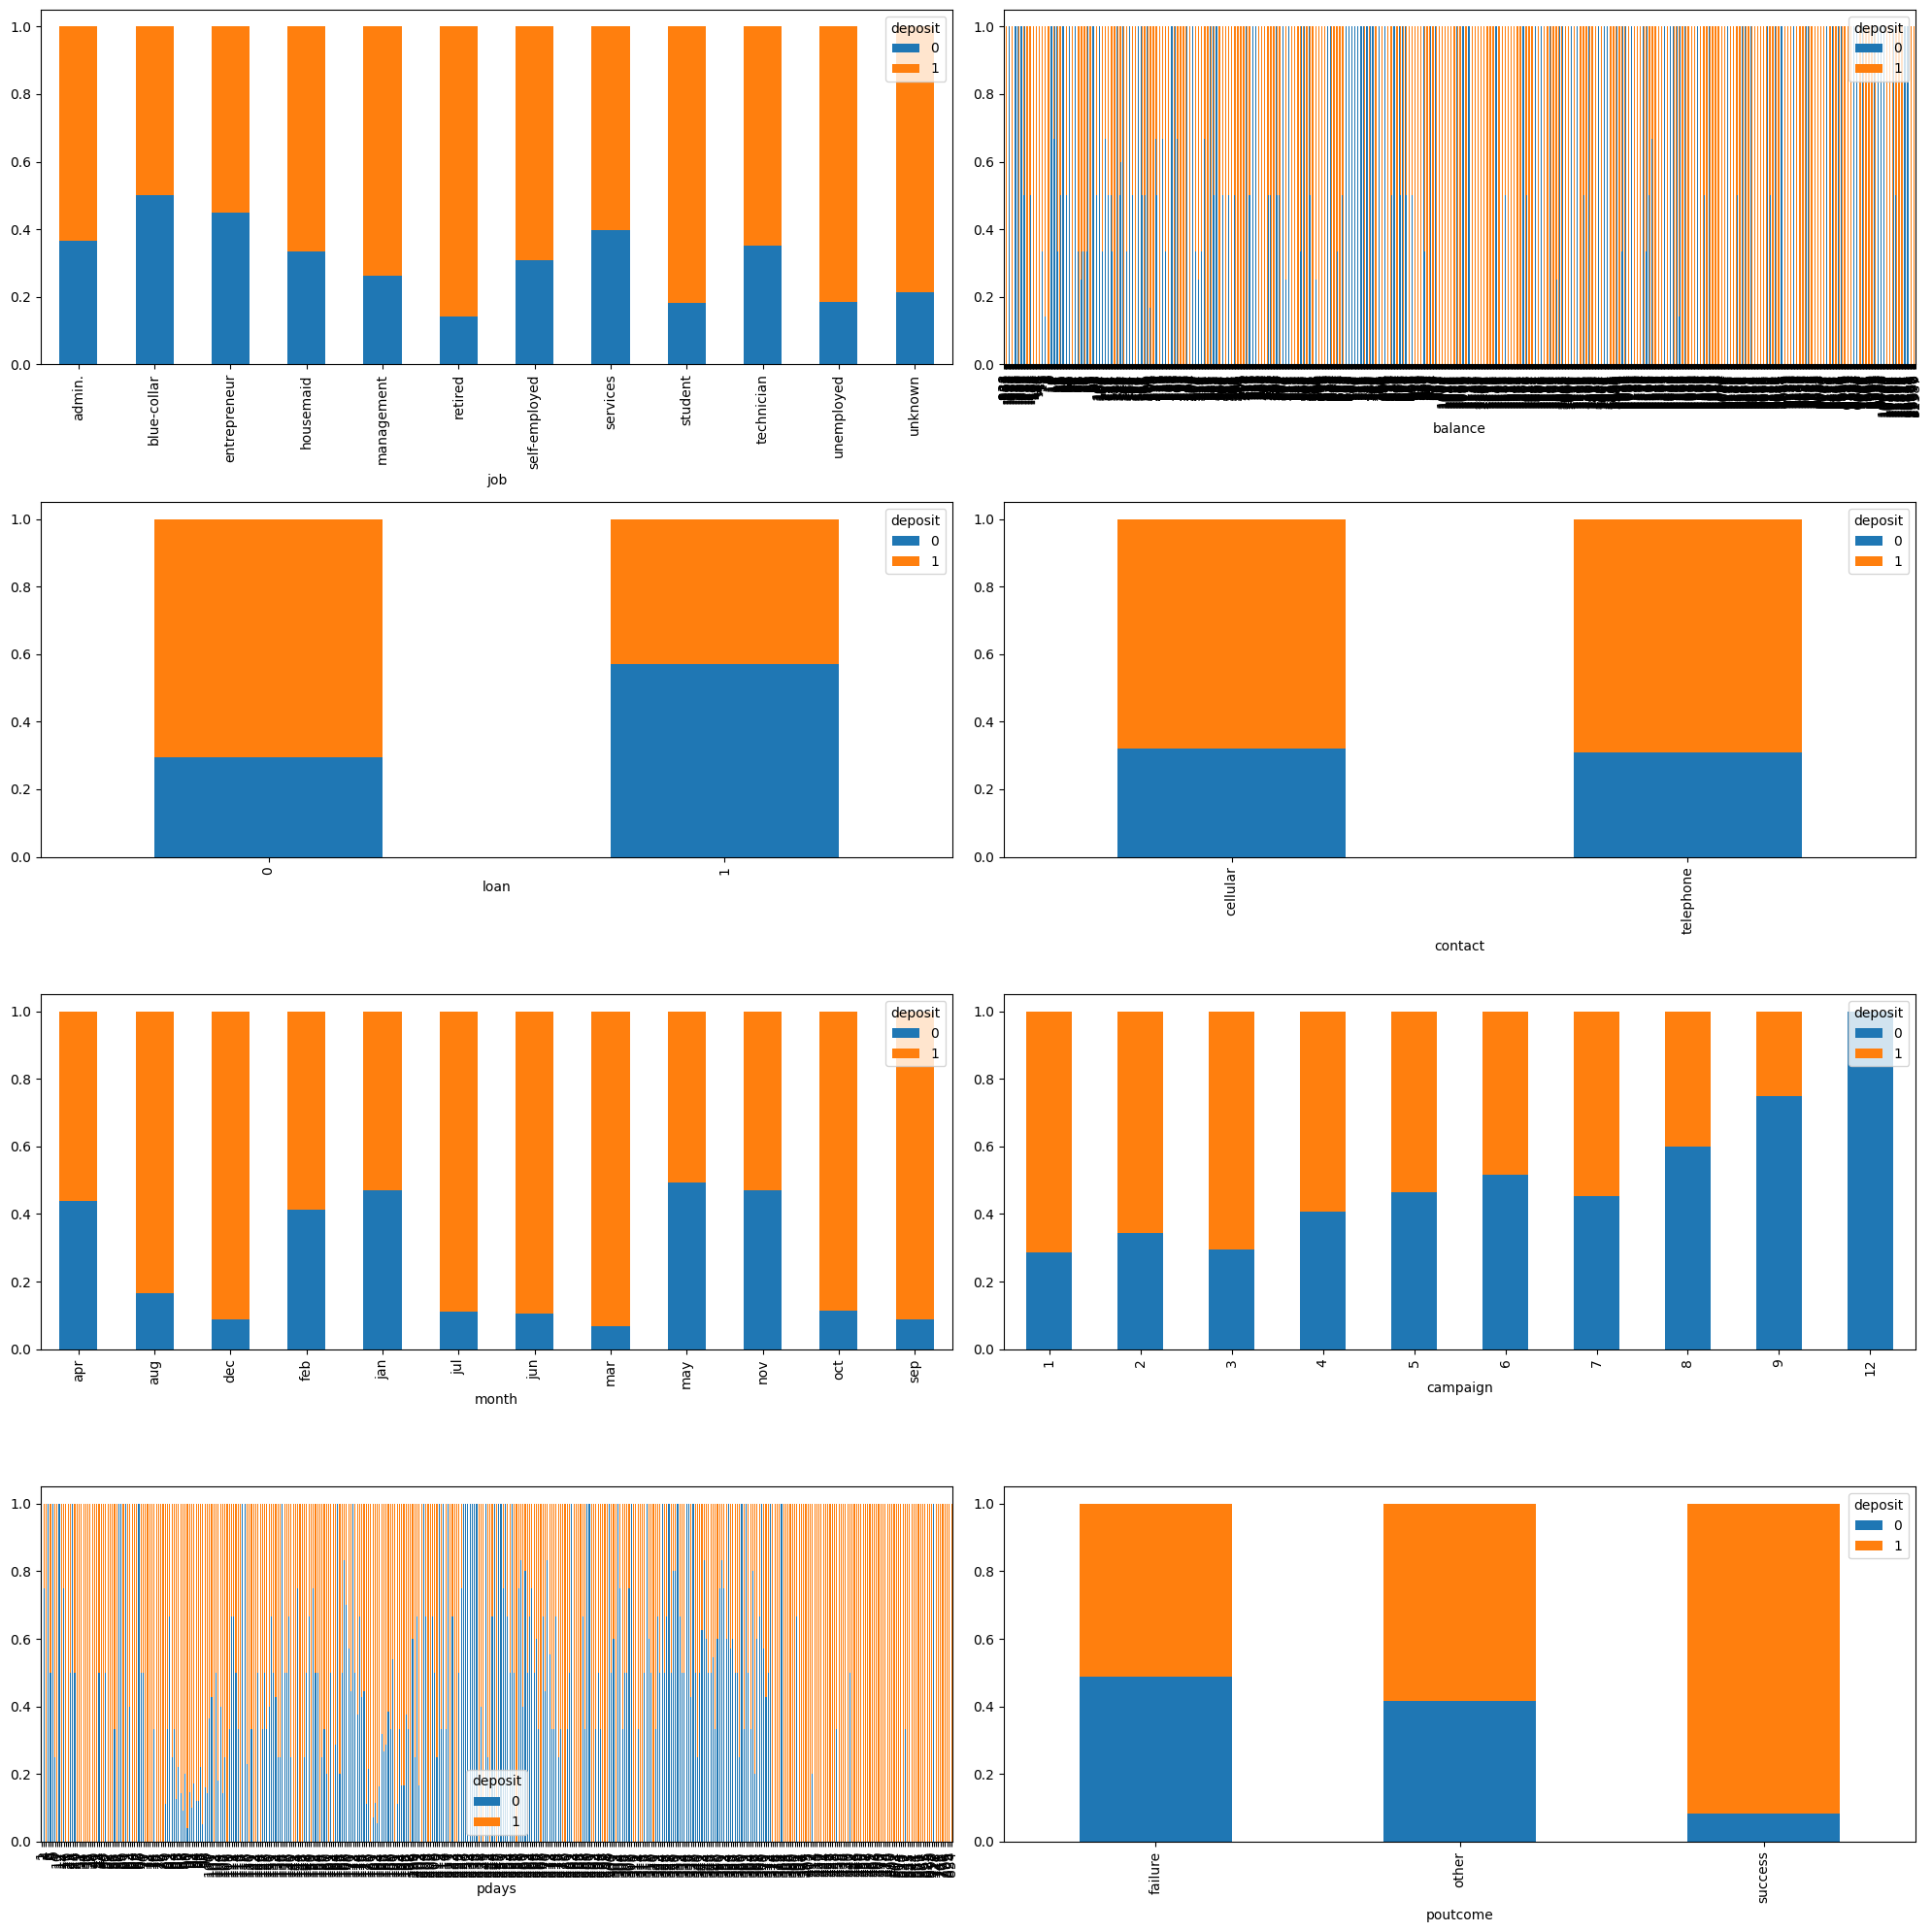

In [ ]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['deposit','age']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

Disini dapat dilihat bahwa jika dikolom *balance* menunjukan dimana banyak orang yang menggunakan deposit. Untuk di bagan loan dimana hanya sedikit saja yang menggunakan deposit. Mungkin orang orang yang memiliki pinjaman hanya befokus pada pelunasannya sedangkan orang orang yang memiliki saldo lebih besar banyak yang meggunakan deposit.

In [ ]:
relevent_experience_df = df.groupby('balance')['deposit'].value_counts(normalize=True).unstack()
relevent_experience_df['count'] = df.groupby('balance')['deposit'].count()

# Check if the value 1.0 is present in the columns
if 1.0 in relevent_experience_df.columns:
    # Display the top and bottom rows
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False).head(15))
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False).tail(15))
else:
    print("Column with label 1.0 not found in DataFrame.")

deposit,0,1,count
balance,,,
-556,NaN,1.0,1
1989,NaN,1.0,2
2013,NaN,1.0,1
2016,NaN,1.0,1
2022,NaN,1.0,1
2027,NaN,1.0,1
2033,NaN,1.0,2
2046,NaN,1.0,1
2048,NaN,1.0,1


deposit,0,1,count
balance,,,
8564,1.0,NaN,1
8876,1.0,NaN,1
9374,1.0,NaN,1
9447,1.0,NaN,1
10005,1.0,NaN,1
10041,1.0,NaN,1
11222,1.0,NaN,1
13054,1.0,NaN,1
13156,1.0,NaN,1


#Data Preparation

In [ ]:
df.head(31)

,age,job,balance,loan,contact,month,campaign,pdays,poutcome,deposit
2,51,admin.,3025,0,cellular,may,1,352,other,1
7,36,technician,911,1,cellular,may,2,21,failure,1
10,23,student,1234,0,cellular,feb,1,91,success,1
15,38,technician,88,0,cellular,nov,2,186,success,1
18,31,technician,863,0,cellular,feb,1,263,success,0
19,46,management,242,0,cellular,aug,2,96,success,1
20,48,services,2597,0,cellular,may,2,355,failure,0
23,35,management,0,0,cellular,nov,2,96,success,1
26,28,student,3733,0,cellular,aug,5,91,success,0
32,33,technician,348,0,cellular,may,2,294,success,0


Kta akan melakukan  encoding pada masiing masing kolom yang ada di dalam data set tersebut

In [ ]:
mean_pdays = df['pdays'].mean()
mean_pdays

202.30485338725987

In [ ]:
ordinal_mapping = [
    {'col':'month',
    'mapping':{
        'jan'      :    0,
        'feb'       :    1,
        'mar'       :    2,
        'apr'       :    3,
        'may'       :    4,
        'jun'       :    5,
        'jul'       :    6,
        'aug'       :    7,
        'sep'       :    8,
        'oct'       :    9,
        'nov'      :    10,
        'dec'      :    11,

    }}
]

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job', 'contact']),
    ('binary', ce.BinaryEncoder(), ['deposit', 'loan','poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month']),
    ('passthrough', 'passthrough', ['balance'])
], remainder='passthrough')


In [ ]:
x= df
y = df['deposit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [ ]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


,onehot__x0_blue-collar,onehot__x0_entrepreneur,onehot__x0_housemaid,onehot__x0_management,onehot__x0_retired,onehot__x0_self-employed,onehot__x0_services,onehot__x0_student,onehot__x0_technician,onehot__x0_unemployed,onehot__x0_unknown,onehot__x1_telephone,binary__deposit,binary__loan,binary__poutcome_0,binary__poutcome_1,ordinal__month,balance,age,campaign,pdays
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1750.0,35.0,1.0,175.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0,25.0,39.0,1.0,210.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,572.0,33.0,1.0,74.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2331.0,65.0,1.0,92.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,4401.0,53.0,1.0,92.0


#Modeling & Evaluation

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [ ]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 861, number of negative: 404
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 1265, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680632 -> initscore=0.756680
[LightGBM] [Info] Start training from score 0.756680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,mean roc_auc,sdev
model,,
Decision Tree,1.000000,0.000000
Random Forest,1.000000,0.000000
XGBoost,1.000000,0.000000
LightGBM,1.000000,0.000000
Logistic Regression,0.998397,0.002799
KNN,0.629647,0.015118


### Model Benchmarking : Test Data

Ubah jadi true label pada kolom deposit

In [ ]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       127
           1       0.98      1.00      0.99       269

    accuracy                           0.99       396
   macro avg       0.99      0.98      0.99       396
weighted avg       0.99      0.99      0.99       396

KNN 
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       127
           1       0.72      0.80      0.76       269

    accuracy                           0.65       396
   macro avg       0.58      0.56      0.56       396
weighted avg       0.63      0.65      0.63       396

Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       269

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1

,roc_auc score
model,
Decision Tree,1.000000
Random Forest,1.000000
XGBoost,1.000000
LightGBM,1.000000
Logistic Regression,0.999678
KNN,0.553523


Accuracy: Semua model (Decision Tree, Random Forest, dan XGBoost) memiliki akurasi yang sangat tinggi, mencapai 100%. Ini bisa menunjukkan bahwa model-model ini sangat baik dalam memprediksi data pada dataset yang Anda gunakan.

Precision dan Recall: Precision dan Recall adalah metrik penting dalam kasus klasifikasi. Model-model lainnya memiliki nilai precision dan recall yang cukup baik, sementara model KNN memiliki precision dan recall yang lebih rendah untuk kelas 0. Hal ini bisa mengindikasikan bahwa model KNN mungkin mengalami kesulitan dalam mengidentifikasi kelas minoritas (kelas 0).

F1-Score: F1-score adalah rata-rata harmonik antara precision dan recall. Model-model lain memiliki F1-score yang tinggi, sementara model KNN memiliki F1-score yang lebih rendah, sejalan dengan nilai precision dan recall yang rendah untuk kelas 0.

Macro dan Weighted Average: Metrik ini memberikan rata-rata dari nilai precision, recall, dan F1-score untuk semua kelas. Nilai macro average dan weighted average tampaknya cukup tinggi untuk semua model, menunjukkan performa yang baik secara umum.

In [ ]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [ ]:
data = x_train
target = y_train

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 969, number of negative: 454
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 1423, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680956 -> initscore=0.758167
[LightGBM] [Info] Start training from score 0.758167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

####Evaluation Metrics Without Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Evaluation Metrics With Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Classification Reports Without Oversampling

In [ ]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       108

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       108

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       107

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

              preci

#### Classification Reports With Oversampling

In [ ]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       108

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       108

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       107

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

              preci

### Hyperparameter Tuning

In [ ]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [ ]:
hyperparam_space = [{
    'model__max_bin': [255, 275],
    'model__num_leaves': [31, 21],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations': [100, 75],
    'model__learning_rate': [0.1, 0.075],
    'model__random_state': [42]
}]


In [ ]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [ ]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1077, number of negative: 1077
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 2154, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


- model__learning_rate: 0.1
- model__max_bin: 255
- model__min_data_in_leaf: 20
- model__num_iterations: 100
- model__num_leaves: 31
- model__random_state: 42

Hyperparameter yang di dapat adalah sebagai berikut

In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1077, number of negative: 1077
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 2154, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'contact']),
                                                 ('binary', BinaryEncoder(),
                                                  ['deposit', 'loan',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7

In [ ]:
estimator = best_model

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparam_space,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit the RandomizedSearchCV instance on your data
random_search.fit(x_train, y_train)

# Once the fitting is done, you can access the best model via 'random_search.best_estimator_'
best_model = random_search.best_estimator_

# Now you can use the best_model for predictions or other tasks
predictions = best_model.predict(x_test)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 1077, number of negative: 1077
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 2154, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
ROC AUC Score Default LGBM :  1.0
ROC AUC Score Tuned LGBM :  1.0


Disini tidak terjadi kenaikan dan jumlahnya hanya tetap

In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       269

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       269

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LGBM kita

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


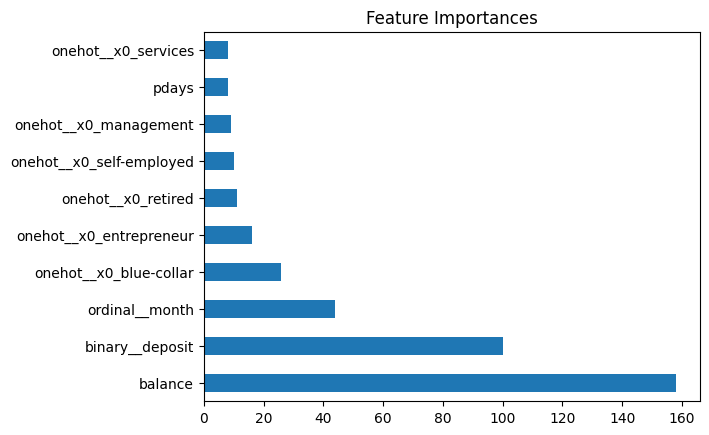

In [ ]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dapat dilihat bahwa diagram yang daapat adalah sebagai, berikut dapat dilihat bahwa kolom balance adalah bagian terepenting ,juga diikuti  dengan deposit dan month. Ini membuktikan keterkaitannya dalam mencari pelanggan yang akan melakukan deposit.

In [ ]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       269

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



Dalam hasil ini, terdapat beberapa metrik evaluasi performa model seperti precision, recall, dan f1-score untuk masing-masing kelas (0 dan 1), serta nilai rata-rata dari semua kelas. Nilai-nilai yang sangat tinggi (1.00) menunjukkan bahwa model memiliki performa yang sangat baik dalam melakukan klasifikasi terhadap kedua kelas. Skor akurasi yang mencapai 1.00 menandakan bahwa model berhasil memprediksi dengan benar pada keseluruhan dataset.

Dengan hasil yang sangat baik ini, model LightGBM yang telah dituned dapat dianggap sangat efektif dalam melakukan klasifikasi pada data yang digunakan.

#### Recommendation

- Bank harus memperhatikan pelanggan dari segi balance untuk mefilter orang orang yang akan melakukan deposit

- Bank harus memperhatikan sifat sifat orang dari segi contact , dimana hal tersebut bank dapat menempatkan segi pemasaran yang lebih baik

- Segmentasi Pelanggan:
Pisahkan pelanggan menjadi segmen berdasarkan variabel "contact," seperti email, telepon, atau lainnya. Kemudian, analisislah konversi deposito dalam setiap segmen ini. Ini akan membantu Anda memahami metode komunikasi mana yang lebih efektif dalam mendekati pelanggan potensial.

- Analisis Pdays (Previous Days):

Buatlah histogram atau box plot untuk melihat distribusi nilai "pdays." Ini akan membantu Anda memahami seberapa sering pelanggan telah dihubungi sebelum kampanye saat ini.
Jika ada nilai khusus (misalnya, -1) yang mewakili bahwa pelanggan belum pernah dihubungi sebelumnya, analisislah konversi deposito di antara pelanggan yang pernah dihubungi dengan yang belum pernah dihubungi.
Pengaruh Saldo Rekening (Balance):

Visualisasikan distribusi saldo rekening menggunakan histogram atau box plot. Hal ini dapat membantu Anda melihat apakah ada pola khusus dalam kelompok saldo tertentu yang cenderung mendaftar deposito.
Buatlah scatter plot dengan sumbu x adalah saldo rekening dan sumbu y adalah frekuensi kontak pelanggan. Ini bisa membantu Anda melihat apakah pelanggan dengan saldo tertentu cenderung dihubungi lebih sering.